## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [9]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [10]:
sizeA = A.size
densA = np.count_nonzero(A) / sizeA

print("A è densa?:", densA > 0.33)
print("Dimensione A:", A.shape)

sizeA1 = A1.size
densA1 = np.count_nonzero(A1) / sizeA1

print("A1 è densa?:", densA1 > 0.33)
print("Dimensione A1:", A1.shape)

eigA = np.linalg.eigvals(A)
print("A simm?", np.all(A.T == A))
print("A def pos?", np.all(eigA > 0))

eigA1 = np.linalg.eigvals(A1)
print("A1 simm?", np.all(A1.T == A1))
print("A1 def pos?", np.all(eigA1 > 0))

# Le matrici sono sparse di dimensione 500x500, utilizzo quindi i metodi iterativi

A è densa?: False
Dimensione A: (500, 500)
A1 è densa?: False
Dimensione A1: (500, 500)
A simm? True
A def pos? True
A1 simm? True
A1 def pos? True


In [12]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A) 
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.triu(A, 1)
    M=D + E
    N= -F 
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while errore >= toll and it < it_max:
        x=np.linalg.solve(M, N@x0 + b)
        errore=np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [15]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    # inizializzare le variabili necessarie
    x = x0
    r = A@x - b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap=A.dot(p)
        alpha = -(r.T@p) / (p.T@Ap)
        x = x + alpha * p 
        vec_sol.append(x.copy())
        rtr_old= r.T@r
        r= r + alpha * Ap
        gamma= (r.T@r) / rtr_old 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [88]:
x0 = np.zeros_like(b)
tol = 1e-12
itmax = 2000


KA = np.linalg.cond(A)
print(KA)
print(np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A)))
x_gs, it_gs, er_vet_gs = gauss_seidel(A, b, x0, tol, itmax)
x_cg, er_vet_gc, xk_vet_cg, it_cg = conjugate_gradient(A, b, x0, itmax, tol)

KA = np.linalg.cond(A)
sKA = np.sqrt(KA)
print("Fattore conv A CG:", (sKA - 1) / (sKA + 1))

print("It A gs:", it_gs)
print("It A cg:", it_cg)

x_gs1, it_gs1, er_vet_gs1 = gauss_seidel(A1, b1, x0, tol, itmax)
x_cg1, er_vet_gc1, xk_vet_cg1, it_cg1 = conjugate_gradient(A1, b1, x0, itmax, tol)

KA1 = np.linalg.cond(A1)
sKA1 = np.sqrt(KA1)
print("Fattore conv A1 CG:", (sKA1 - 1) / (sKA1 + 1))

print("It A1 gs:", it_gs1)
print("It A1 cg:", it_cg1)

100.00000000000234
5467.440676421871
raggio spettrale Gauss-Seidel  0.9399020442983509
Fattore conv A CG: 0.8181818181818201
It A gs: 365
It A cg: 125
raggio spettrale Gauss-Seidel  0.9993658641407411
Fattore conv A1 CG: 0.9838023218695694
It A1 gs: 1
It A1 cg: 0


C:\Users\dedde\AppData\Local\Temp\ipykernel_17324\3102484017.py:17: RuntimeWarning: invalid value encountered in scalar divide
  errore=np.linalg.norm(x - x0) / np.linalg.norm(x)
C:\Users\dedde\AppData\Local\Temp\ipykernel_17324\3653230648.py:12: RuntimeWarning: invalid value encountered in scalar divide
  errore=np.linalg.norm(r)/nb


Il fattore di convergenza è il nostro indicatore della velocità di convergenza del problema, dove nel caso di Gauss Seidel è il raggio spettrale di T, ovvero della matrice di iterazione, mentre il fattore di convergenza del metodo del gradiente coniugato è (sqrt(K(A)) - 1) / (sqrt(K(A)) + 1). Poiché nel caso di Gauss Seidel il fattore di convergenza è più basso rispetto a quello del gradiente coniugato per entrambe le matrici, si può dire che il gradiente coniugato è più veloce per questo tipo di matrici. Sono entrambi molto lenti poiché più il fattore di convergenza è vicino ad 1 più il metodo è lento a convergere. Sono entrambi metodi con ordine di convergenza lineari.

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**





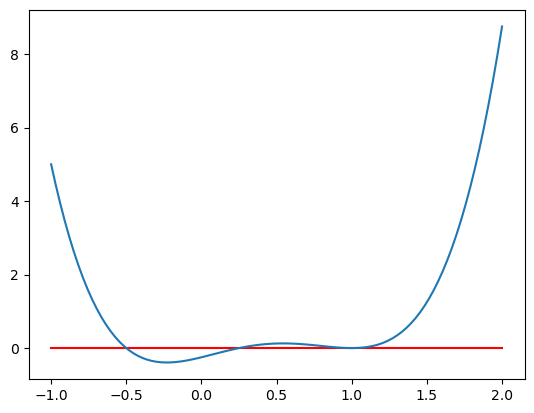

In [20]:
import sympy as sym
import matplotlib.pyplot as plt

xs = sym.symbols('x')
fs = 2 * xs**4 - (7 / 2) * xs**3 + (3 / 4) * xs**2 + xs - 1 / 4
fds = sym.diff(fs, xs)
f = sym.lambdify(xs, fs, np)
fd = sym.lambdify(xs, fds, np)

x = np.linspace(-1, 2, 100)

plt.plot(x, np.zeros_like(x), 'r-', x, f(x))
plt.show()

# Dal grafico si percepisce che la funzione intersechi in 3 punti con l'asse delle x

In [21]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
    xk=[]
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while errorex >= tolx and erroref >= tolf and it < nmax:
       fx0=fname(x0)
       if fpname(x0) == 0:
            print(" derivata prima nulla in x0")
            return None, None,None
       d=fx0 / fpname(x0)
       x1= x0 - d
       fx1=fname(x1)
       erroref=np.abs(fx1)
       if x1!=0:
            errore=np.abs(x0 - x1) / np.abs(x1)
       else:
            errore=np.abs(x0 - x1)
       it=it+1
       x0=x1
       xk.append(x1)
    if it==nmax:
        print('Newton: raggiunto massimo numero di iterazioni \n')
    return x1,it,xk

In [22]:
def newton_modificato(fname,fpname,x0,tolx,tolf,nmax,m):
    #m è la molteplicità dello zero
    xk=[]
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while erroref >= tolf and errorex >= tolx and it < nmax:
       fx0=fname(x0)
       if fpname(x0) == 0:
            print(" derivata prima nulla in x0")
            return None, None,None
       d= m * fx0 / fpname(x0)
       x1=x0 - d
       fx1=fname(x1)
       erroref=np.abs(fx1)
       if x1!=0:
            errore=np.abs(x0 - x1) / np.abs(x1)
       else:
            errore=np.abs(x0 - x1)
       it=it+1
       x0=x1
       xk.append(x1)
    if it==nmax:
        print('Newton modificato: raggiunto massimo numero di iterazioni \n')
    return x1,it,xk

In [23]:
def metodo_bisezione(fname, a, b, tolx):
    fa=fname(a)
    fb=fname(b)
    if fb * fa >= 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None
    it = 0
    v_xk = []
    while np.abs(b - a) >= tolx:
        xk = a + (b - a) / 2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
        if fxk * fb < 0:
            a = xk
            fa= fxk 
        elif fxk * fa < 0:
            b = xk
            fb= fxk
    return xk, it, v_xk

In [24]:
a1 = -1.0
b1 = 0.0
a2 = 0.0
b2 = 0.5
a3 = 0.5
b3 = 1.0

tolx = 1e-12
tolf = 1e-12
itmax = 2000

x1_b, it1_b, xk1_b = metodo_bisezione(f, a1, b1, tolx)
x2_b, it2_b, xk2_b = metodo_bisezione(f, a2, b2, tolx)
x3_b, it3_b, xk3_b = metodo_bisezione(f, a3, b3, tolx)

print("Bisezione:")
print("x1:", x1_b, "x2:", x2_b, "x3:", x3_b)

Non è possibile applicare il metodo di bisezione 

Bisezione:
x1: -0.5 x2: 0.25 x3: None


Poiché il metodo di bisezione chiede per ipotesi che la funzione sia discorde nell'intervallo selezionata, cioè f: [a, b] -> R con f(a) * f(b) < 0, nel terzo intervallo la funzione tocca x3, ma non passa sotto la funzione, risultando in f(b) = 0 e quindi non è possibile applicare il metodo di bisezione in quell'intervallo.

In [26]:
x0_1 = -1.0
x0_2 = 0.2
x0_3 = 1.25

x1_n, it1_n, xk1_n = newton(f, fd, x0_1, tolx, tolf, itmax)
x2_n, it2_n, xk2_n = newton(f, fd, x0_2, tolx, tolf, itmax)
x3_n, it3_n, xk3_n = newton(f, fd, x0_3, tolx, tolf, itmax)

print("Newton:")
print("x1:", x1_n, "x2:", x2_n, "x3:", x3_n)

Newton:
x1: -0.5 x2: 0.25 x3: 1.0000003582753487


In [27]:
def stima_ordine(xk,iterazioni):
    k=iterazioni-4
    p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
    ordine=p
    return ordine

In [28]:
print("Ordine x1 newton:", stima_ordine(xk1_n, it1_n))
print("Ordine x2 newton:", stima_ordine(xk2_n, it2_n))
print("Ordine x3 newton:", stima_ordine(xk3_n, it3_n))

Ordine x1 newton: 2.000109062033738
Ordine x2 newton: 1.9987978265301272
Ordine x3 newton: 0.9999744959612717


Il metodo di Newton risulta a convergenza lineare nel caso la radice calcolata sia di molteplicità m > 1. Per risolvere il problema, nasce il metodo di Newton modificato, dove si moltiplica la molteplicità della radice m ad ogni iterato xk+1 = xk + m*f(xk)/f'(xk).

In [31]:
m = 2

x3_nm, it3_nm, xk3_nm = newton_modificato(f, fd, x0_3, tolx, tolf, itmax, m)

print("Newton modificato:")
print("x3:", x3_nm)

print("Ordine x3 newton modificato:", stima_ordine(xk3_nm, it3_nm))

Newton modificato:
x3: 1.000000000148932
Ordine x3 newton modificato: 1.9977638676753289


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 x  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

x  A trovare i migliori iperparametri del modello

- Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa è un Multi-Layer Perceptron?**

x  Una rete multi-livello composta da neuroni completamente connessi

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

x Trasforma i digits della rete in probabilità

- Trasforma le probabilità della rete in digits

-  Normalizza i valori di input della rete

-  È indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

x Nel predire un valore continuo in output

· Nel predire una classe in output

· Nel predire un gruppo di appartenenza del dato di input

· Nel predire una categoria in output

## Domande Aperte

**6. ** Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7 Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

In [ ]:
** 